In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

red = '#e8321b'
blue = '#1b69e8'

In [2]:
import os
import pandas as pd

In [3]:
path = '../sparse/'

Load vocabulary

In [4]:
vocab = pd.read_csv(path+'sparse_tmp_vocab-code.txt', header=None)
vocab.shape

(1156, 1)

Load predictions results

In [7]:
results_df = pd.read_csv(path+'cls_output-varname/test_results.tsv', header=None, sep='\t')
results_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155
0,0.000019,8.099375e-06,0.992974,4.954076e-06,6.187318e-06,0.000003,0.000003,0.000020,0.000007,4.155489e-06,...,0.000005,0.000008,0.000005,0.000006,5.796720e-06,0.000004,5.334173e-06,0.000002,1.165616e-05,4.242901e-06
1,0.000227,1.149912e-04,0.000051,7.525876e-05,9.167358e-05,0.000052,0.000778,0.000117,0.000053,7.151416e-05,...,0.000073,0.000032,0.000085,0.000048,3.426078e-05,0.000144,1.159608e-04,0.000032,4.544693e-05,3.708797e-05
2,0.000022,1.956020e-05,0.000035,1.099442e-05,2.167958e-05,0.000020,0.000029,0.000060,0.000021,5.586033e-05,...,0.000013,0.000009,0.000011,0.000013,3.160681e-05,0.000021,1.222850e-05,0.000009,1.069300e-05,1.085431e-05
3,0.000016,7.024633e-07,0.000005,1.028718e-06,8.913152e-07,0.000002,0.000002,0.000002,0.000001,8.076341e-07,...,0.000002,0.000002,0.000003,0.000001,1.046853e-06,0.000004,9.981476e-07,0.000002,1.038728e-06,8.094075e-07
4,0.001321,3.162005e-04,0.001606,4.376359e-04,3.684731e-04,0.000417,0.001189,0.000361,0.000147,6.393947e-04,...,0.000382,0.000244,0.000298,0.000313,3.891494e-04,0.000766,6.712895e-04,0.000225,5.968320e-04,2.373134e-04
5,0.912614,3.211835e-05,0.000125,5.004522e-05,2.064783e-05,0.000028,0.000088,0.000133,0.000013,2.924057e-05,...,0.000024,0.000029,0.000040,0.000027,4.187433e-05,0.000097,5.295289e-05,0.000039,5.497635e-05,6.087103e-05
6,0.912614,3.211835e-05,0.000125,5.004522e-05,2.064783e-05,0.000028,0.000088,0.000133,0.000013,2.924057e-05,...,0.000024,0.000029,0.000040,0.000027,4.187433e-05,0.000097,5.295289e-05,0.000039,5.497635e-05,6.087103e-05
7,0.912614,3.211835e-05,0.000125,5.004522e-05,2.064783e-05,0.000028,0.000088,0.000133,0.000013,2.924057e-05,...,0.000024,0.000029,0.000040,0.000027,4.187433e-05,0.000097,5.295289e-05,0.000039,5.497635e-05,6.087103e-05
8,0.000015,6.389101e-07,0.000006,9.581871e-07,9.826082e-07,0.000002,0.000002,0.000002,0.000001,7.745513e-07,...,0.000002,0.000002,0.000003,0.000002,9.622887e-07,0.000003,9.946224e-07,0.000001,9.516547e-07,8.291184e-07
9,0.000344,1.332646e-04,0.000294,3.953951e-04,4.366254e-04,0.000610,0.000824,0.000630,0.000105,2.750462e-04,...,0.000306,0.000344,0.000374,0.000232,2.463795e-04,0.000259,4.406933e-04,0.000323,2.994540e-04,2.892509e-04


Load labels

In [8]:
label_df = pd.read_csv(path+'sparse_split_magret_label_val.txt', header=None)
label_df.head(10)

,0,1,2,3,4
0,x,[PAD],[PAD],[PAD],NaN
1,mean,[PAD],[PAD],[PAD],NaN
2,cast,[PAD],[PAD],[PAD],NaN
3,mean,[PAD],[PAD],[PAD],NaN
4,append,[PAD],[PAD],[PAD],NaN
5,delta,t,batch,[PAD],NaN
6,self,[PAD],[PAD],[PAD],NaN
7,k,[PAD],[PAD],[PAD],NaN
8,progbar,[PAD],[PAD],[PAD],NaN
9,self,[PAD],[PAD],[PAD],NaN


Get the prediction specific to this attention matrix

In [10]:
n=3; i=3
preds = []
for idx, row in results_df.iterrows():
    top_n = list(np.argsort(-row)[:n])
    preds.append(top_n[:n])
    if (idx % 64 == 63) and (idx > 0):
        preds = np.asarray(preds)
        k = np.nonzero(preds[:,0])[0]
        last_idx=k[-2]+1        
        pred = [vocab.loc[p][0] for p in preds[:last_idx,0]]
        print(idx // 64, ' '.join(pred))
        print("Label = ", ' '.join(list(label_df.loc[idx//64][:4])))
        preds = []
        print()
    if idx > i*64:
        break

0 [CLS] for tuple name x [PAD] [PAD] [PAD] name y name mask call name name name name assign subscript name index name tuple name
Label =  x [PAD] [PAD] [PAD]

1 [CLS] call attribute append [PAD] [PAD] [PAD] name call attribute equal name name call attribute items name name keyword unaryop usub
Label =  mean [PAD] [PAD] [PAD]

2 [CLS] call attribute items [PAD] [PAD] [PAD] name call attribute equal name call attribute argmax name name keyword unaryop usub num call attribute argmax name name keyword unaryop num call attribute floatx
Label =  cast [PAD] [PAD] [PAD]



In [11]:
# Actual sentence length, unpadded
emb_len = len(pred)

In [12]:
emb_len

32

Read the attention values

In [14]:
att = np.asarray(pd.read_csv(path+'cls_output-varname/attention_results.tsv', sep=' ', header=None))[:,:-1]
att.shape

FileNotFoundError: [Errno 2] File b'../sparse/cls_output-varname/attention_results.tsv' does not exist: b'../sparse/cls_output-varname/attention_results.tsv'

In [48]:
nb_heads = 12
seq_len  = 64
attention = att.reshape((nb_heads, seq_len, seq_len))

Plot attention matrices

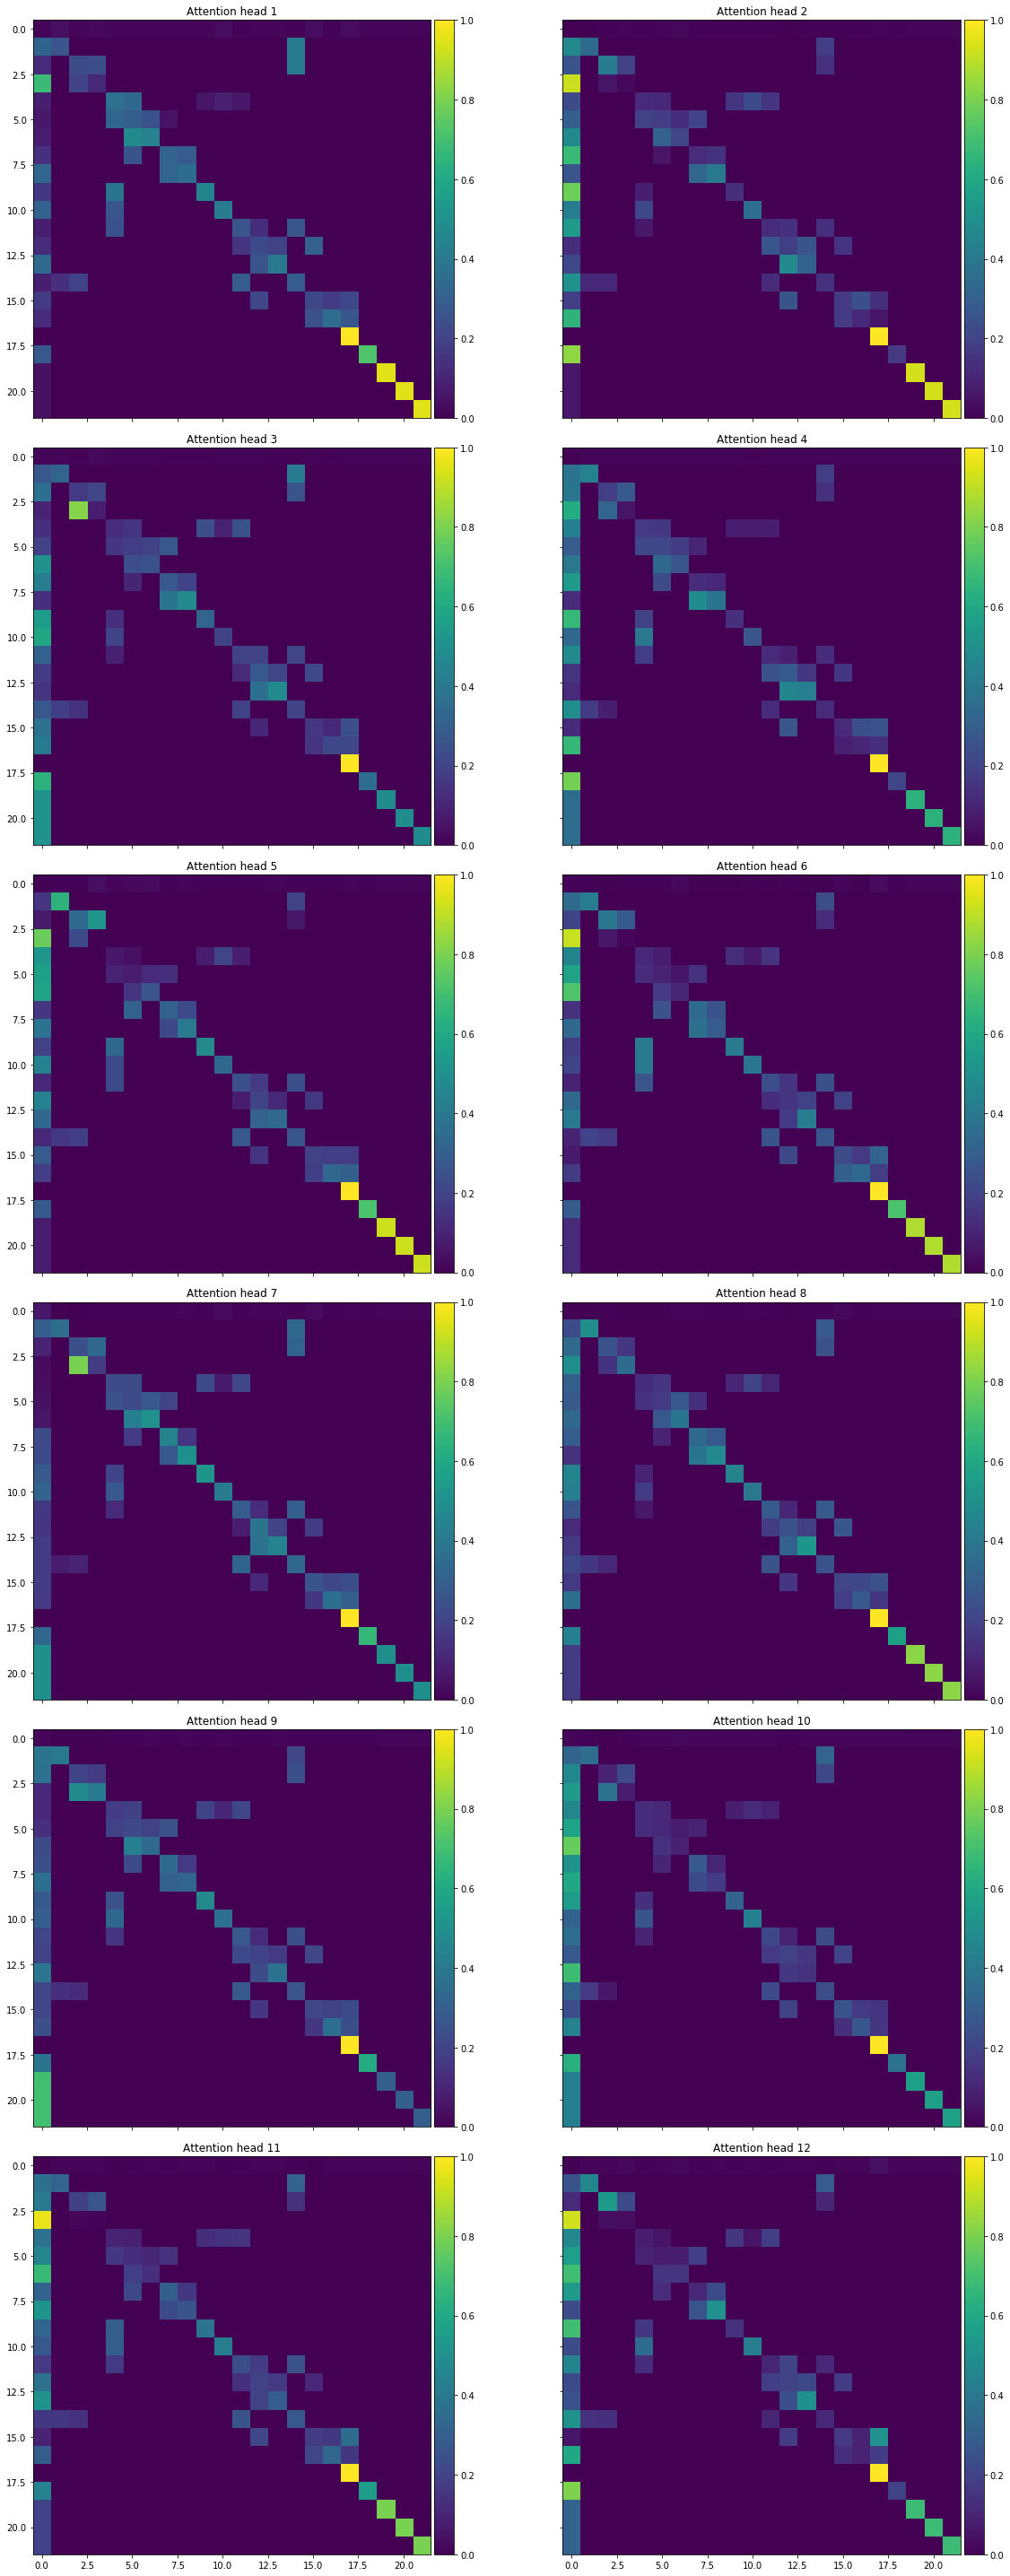

In [49]:
f, axes = plt.subplots(6, 2, sharex='col', sharey='row', figsize=(20,40))
#f.suptitle('Attention head probabilities (Layer #12)')
for i, ax in enumerate(axes.flatten()):
    im = ax.imshow(attention[i, :emb_len, :emb_len])
    ax.set_title("Attention head {}".format(i+1))
    im.set_clim(0, 1)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    f.colorbar(im, cax=cax, orientation='vertical')
    
    plt.tight_layout()
plt.show()

Load adjacency matrix

In [254]:
idx = 1
with open(path+'sparse_split_magret_tk.txt') as f:
    for i in range(idx):
        s = f.readline()

In [255]:
s = s.strip('\n').split(' ')
emb_len = len(s)
s

['[CLS]',
 'For',
 'Name',
 '[MASK]',
 '[MASK]',
 '[MASK]',
 '[MASK]',
 'Attribute',
 'input',
 'layers',
 'Name',
 'Assign',
 'Name',
 'input',
 'tensor',
 'Call',
 'Name',
 'keyword',
 'Attribute',
 'batch',
 'input',
 'shape',
 'Name',
 'keyword',
 'Attribute',
 'dtype',
 'Name',
 'keyword',
 'Attribute',
 'sparse',
 'Name',
 'keyword',
 'Attribute',
 'name',
 'Name',
 'Expr',
 'Call',
 'Attribute',
 'append',
 'Name',
 'Name',
 'Assign',
 'Name',
 'newly',
 'created',
 'input',
 'layer',
 'Subscript',
 'Attribute',
 'keras',
 'history',
 'Name',
 'Index',
 'Num',
 'Assign',
 'Subscript',
 'Name',
 'Index',
 'Name',
 'Name']

In [256]:
from scipy import io

In [257]:
m = io.mmread(path+'adj/'+str(idx-1)+'_sparse_split_magret_adj.mtx')
A = m.toarray()
np.max(A)

1

In [258]:
import networkx as nx

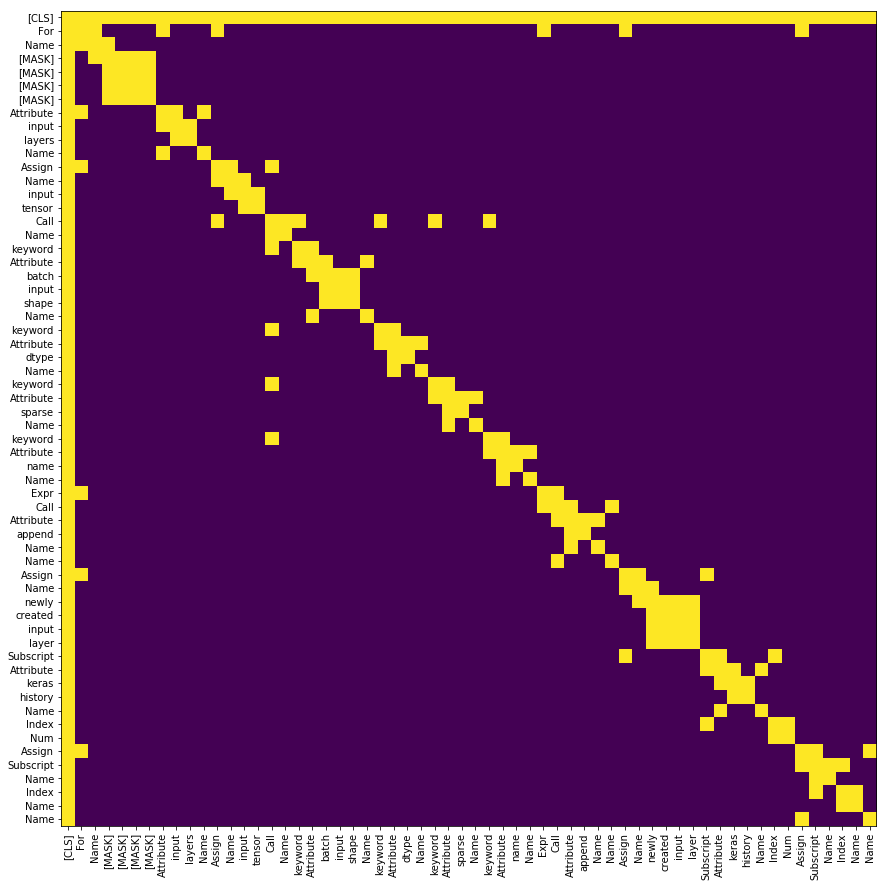

In [259]:
plt.figure(figsize=(15,15))
plt.imshow(A[:emb_len,:emb_len])
plt.xticks(range(emb_len), s, rotation=90);
plt.yticks(range(emb_len), s);

In [62]:
G=nx.from_numpy_matrix(A[:emb_len,:emb_len])
#G.remove_node(0)

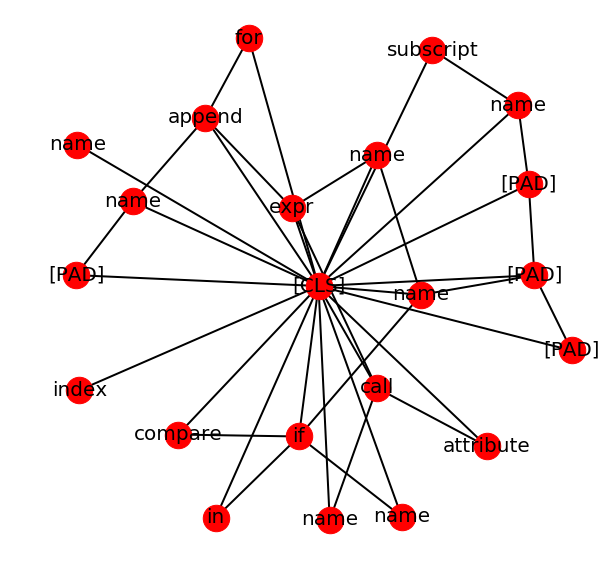

In [67]:
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)  # positions for all nodes
# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
# edges
nx.draw_networkx_edges(G, pos, width=2)
# labels
nx.draw_networkx_labels(G, pos, labels=dict(zip(range(emb_len),pred[:emb_len])), font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

In [37]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12))

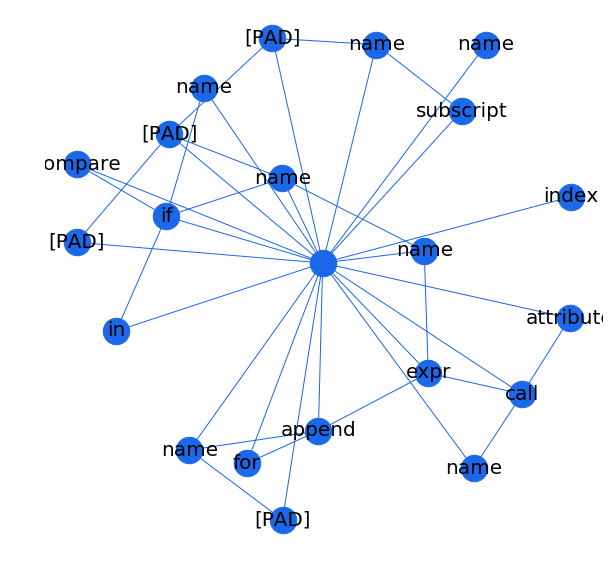

In [73]:
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)  # positions for all nodes
# nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color=blue)
# edges
nx.draw_networkx_edges(G, pos, width=1, edge_color=blue)
# labels
nx.draw_networkx_labels(G, pos, labels=dict(zip(range(1,emb_len),pred[1:emb_len])), font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()

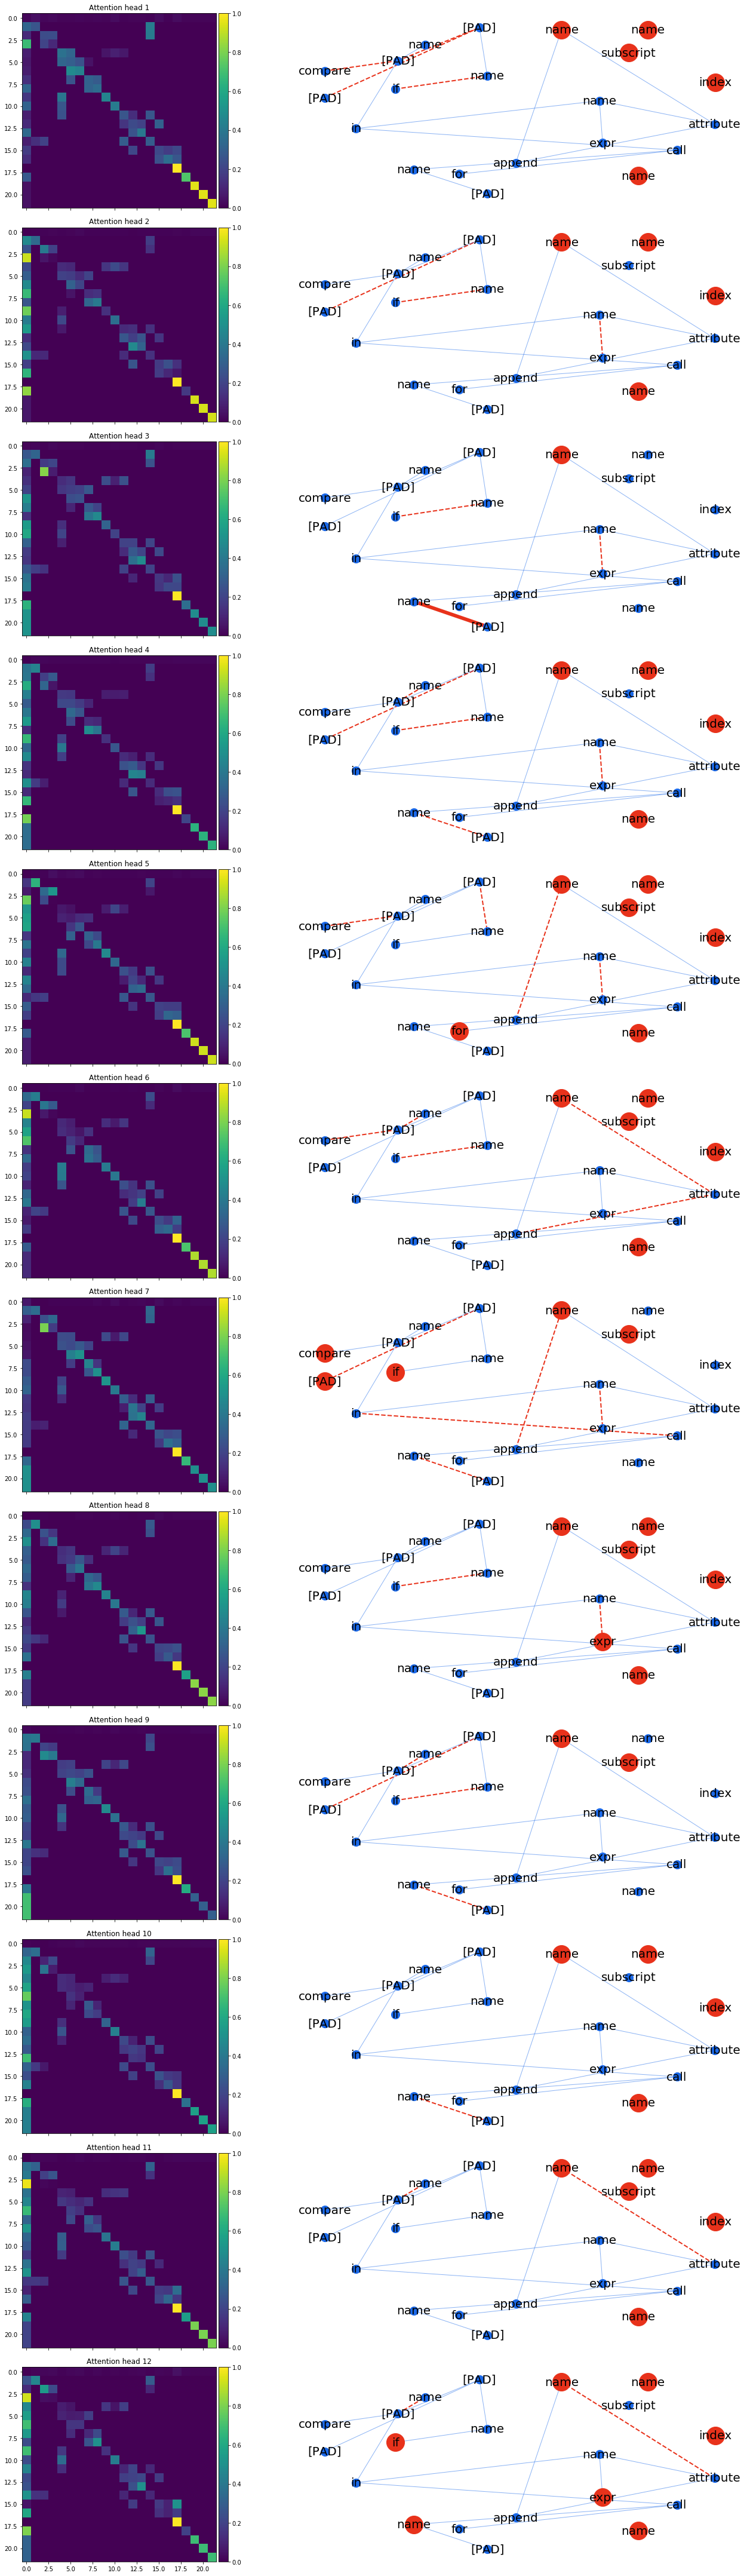

In [75]:
f, axes = plt.subplots(12, 2, sharex='col', figsize=(20,60))

#G0  = nx.from_numpy_matrix(attention[0, 1:emb_len, 1:emb_len])
#pos = nx.spring_layout(G0)  # positions for all nodes
labels = dict(zip(range(1,emb_len),pred[1:emb_len]))

#f.suptitle('Attention head probabilities (Layer #12)')
for i, (ax0, ax1) in enumerate(axes):
    # Attention map
    im = ax0.imshow(attention[i, :emb_len, :emb_len])
    ax0.set_title("Attention head {}".format(i+1))
    im.set_clim(0, 1)
    divider = make_axes_locatable(ax0)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    f.colorbar(im, cax=cax, orientation='vertical')
    
    # -----------------------------------------------------
    # graph
    Gi = nx.from_numpy_matrix(attention[i, :emb_len, :emb_len])
    Gi.remove_node(0)
    
    evlarge = [(u, v) for (u, v, d) in Gi.edges(data=True) if  d['weight'] > 0.8]
    elarge  = [(u, v) for (u, v, d) in Gi.edges(data=True) if (d['weight'] > 0.3) & (d['weight'] <= 0.8)]
    esmall  = [(u, v) for (u, v, d) in Gi.edges(data=True) if  d['weight'] <= 0.3]
    
    lg_self_att = [u for (u,v,d) in Gi.edges(data=True) if (d['weight'] > 0.5) &(u==v)]
    sm_self_att = [u for (u,v,d) in Gi.edges(data=True) if (d['weight'] <= 0.5)&(u==v)]

    # nodes
    nx.draw_networkx_nodes(Gi, pos, nodelist=lg_self_att, node_size=900, ax=ax1, node_color=red)
    nx.draw_networkx_nodes(Gi, pos, nodelist=sm_self_att, node_size=200, ax=ax1, node_color=blue)

    # edges
    nx.draw_networkx_edges(Gi, pos, edgelist=evlarge, width=6, ax=ax1, edge_color=red)
    nx.draw_networkx_edges(Gi, pos, edgelist=elarge,  width=2, ax=ax1, edge_color=red, style='dashed')
    nx.draw_networkx_edges(Gi, pos, edgelist=esmall,  width=1, ax=ax1, alpha=0.5, edge_color=blue)

    # labels
    nx.draw_networkx_labels(Gi, pos, labels=labels, font_size=20, font_family='sans-serif', ax=ax1)

    ax1.axis('off')

    plt.tight_layout()
    
plt.show()